In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
file_path = '/content/regional_families.csv'
family_data = pd.read_csv(file_path)

family_data.head()

,ID,Household_Income,Household_Size,Distance_to_Park,Average_Winter_Travel_Cost,Event_Interest_Score,Social_Media_Engagement,Home_Ownership,Children_in_Household,Winter_Activity_Preference,Pet_Ownership,Income_Bracket,Technology_Usage,Newsletter_Subscriber,County
0,1,42841,4,28.6,247.30,10,21,Own,No,Outdoor,Yes,High,Low,Yes,Sagadahoc
1,2,197100,2,36.6,199.50,9,9,Rent,Yes,Indoor,No,High,High,No,Androscoggin
2,3,143717,5,44.4,386.00,10,35,Rent,No,Outdoor,No,High,Low,No,York
3,4,186311,5,44.9,55.58,3,36,Rent,No,Indoor,Yes,Middle,High,Yes,Oxford
4,5,101642,7,7.4,81.16,8,45,Own,No,Both,Yes,High,Moderate,No,Cumberland


In [20]:
family_data.columns

Index(['ID', 'Household_Income', 'Household_Size', 'Distance_to_Park',
       'Average_Winter_Travel_Cost', 'Event_Interest_Score',
       'Social_Media_Engagement', 'Home_Ownership', 'Children_in_Household',
       'Winter_Activity_Preference', 'Pet_Ownership', 'Income_Bracket',
       'Technology_Usage', 'Newsletter_Subscriber', 'County'],
      dtype='object')

In [21]:
family_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          989 non-null    int64  
 1   Household_Income            989 non-null    int64  
 2   Household_Size              989 non-null    int64  
 3   Distance_to_Park            989 non-null    float64
 4   Average_Winter_Travel_Cost  989 non-null    float64
 5   Event_Interest_Score        989 non-null    int64  
 6   Social_Media_Engagement     989 non-null    int64  
 7   Home_Ownership              989 non-null    object 
 8   Children_in_Household       989 non-null    object 
 9   Winter_Activity_Preference  989 non-null    object 
 10  Pet_Ownership               989 non-null    object 
 11  Income_Bracket              989 non-null    object 
 12  Technology_Usage            989 non-null    object 
 13  Newsletter_Subscriber       989 non

In [22]:
family_data = family_data.drop(columns=['ID'])

Here we are dropping ID to avoid its impact in the calculations.

In [23]:
non_numeric_columns = family_data.select_dtypes(include=['object']).columns

for column in non_numeric_columns:
    print(f"{column}:")
    print(family_data[column].unique())
    print('-' * 50)

Home_Ownership:
['Own' 'Rent']
--------------------------------------------------
Children_in_Household:
['No' 'Yes']
--------------------------------------------------
Winter_Activity_Preference:
['Outdoor' 'Indoor' 'Both']
--------------------------------------------------
Pet_Ownership:
['Yes' 'No']
--------------------------------------------------
Income_Bracket:
['High' 'Middle' 'Low']
--------------------------------------------------
Technology_Usage:
['Low' 'High' 'Moderate']
--------------------------------------------------
Newsletter_Subscriber:
['Yes' 'No']
--------------------------------------------------
County:
['Sagadahoc' 'Androscoggin' 'York' 'Oxford' 'Cumberland' 'Lincoln']
--------------------------------------------------


In [24]:


numeric_columns = family_data.select_dtypes(include=['number']).columns
numeric_data = family_data[numeric_columns]

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

print(scaled_numeric_df.head())

   Household_Income  Household_Size  Distance_to_Park  \
0         -1.312569       -0.219316         -0.400750   
1          1.666125       -1.099249          0.256043   
2          0.635316        0.220651          0.896415   
3          1.457793        0.220651          0.937465   
4         -0.177140        1.100584         -2.141249   

   Average_Winter_Travel_Cost  Event_Interest_Score  Social_Media_Engagement  
0                   -0.248479              1.509492                -0.242739  
1                   -0.619801              1.165826                -1.050374  
2                    0.828974              1.509492                 0.699501  
3                   -1.737804             -0.896174                 0.766803  
4                   -1.539093              0.822159                 1.372529  


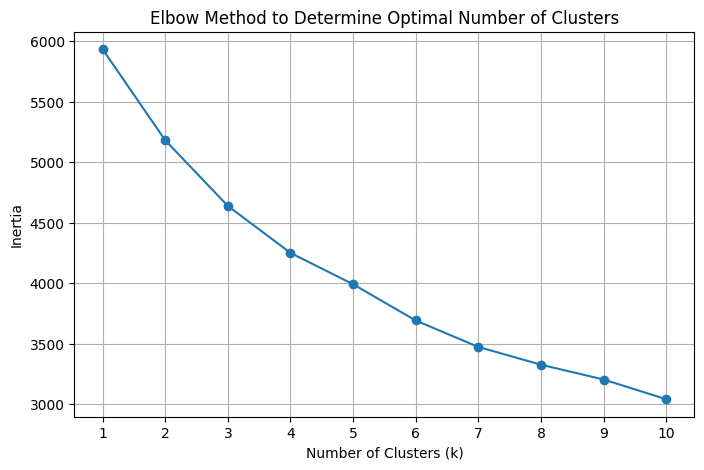

In [25]:


inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_numeric_df)
    inertia.append(kmeans.inertia_)

# Elbow Chart
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Decision**

Here, we decide to choose 4 as the optimal for the model as we can see there's a slight change in the trend after the 4th quadrant. Also, taking 4 clusters in the analysis would be easier to explain than taking too many.

In [26]:
optimal_k = 4

In [27]:

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_numeric_df)

family_data['Cluster'] = kmeans.labels_

In [28]:
family_data['Cluster'].groupby(family_data['Cluster']).count()

,Cluster
Cluster,
0,170
1,327
2,264
3,228


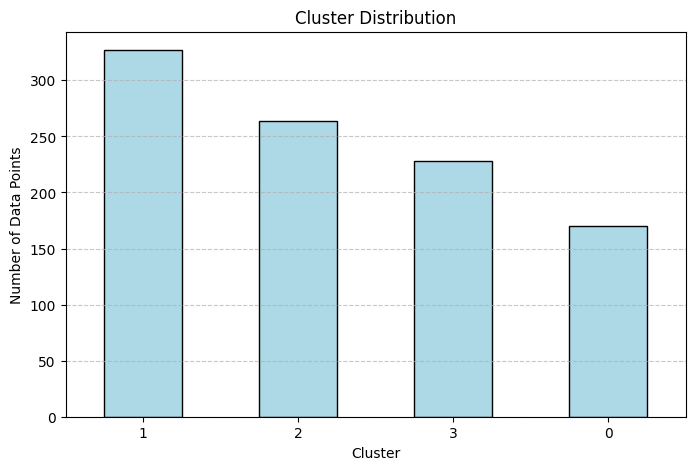

In [29]:
plt.figure(figsize=(8, 5))
family_data['Cluster'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualizations:

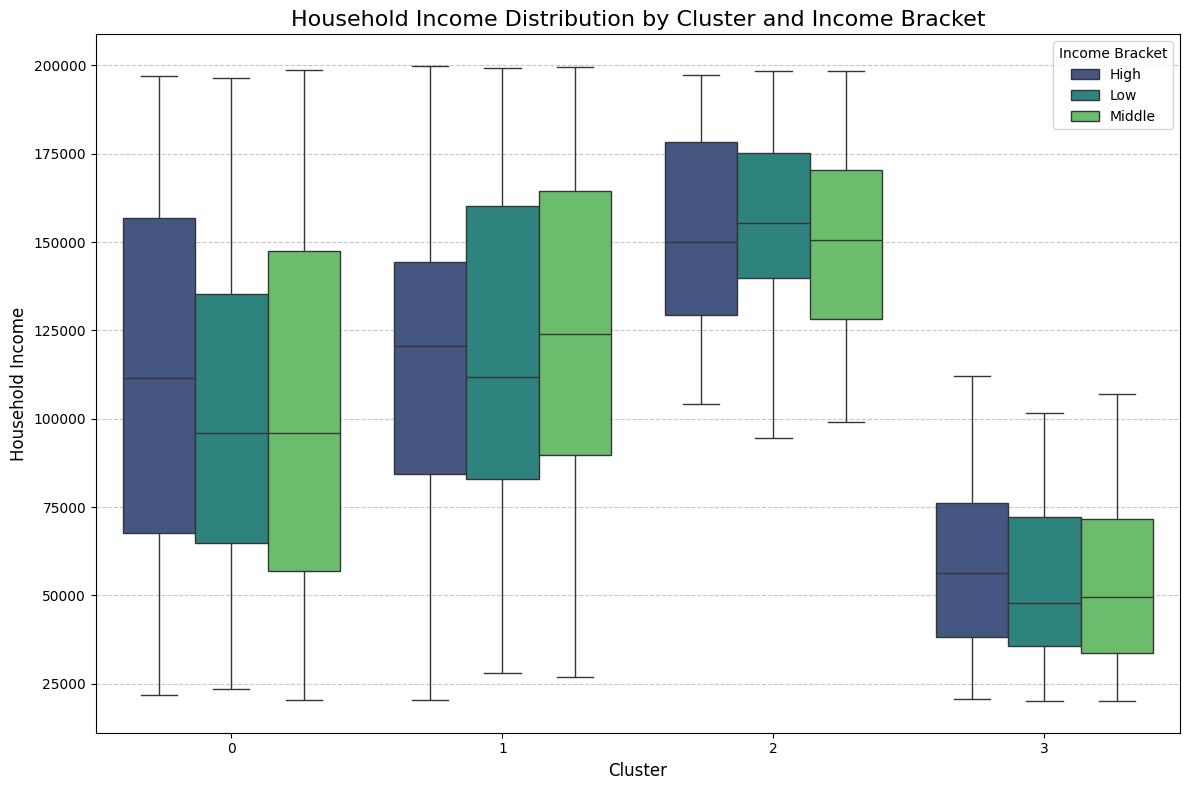

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Cluster',
    y='Household_Income',
    hue='Income_Bracket',
    data=family_data,
    palette='viridis'
)

plt.title('Household Income Distribution by Cluster and Income Bracket', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Household Income', fontsize=12)
plt.legend(title='Income Bracket', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Interpretation:

**Cluster 0:**

- The high-income group shows a wider range with a median closer to $150,000.

- The middle income group has a tighter distribution with a median around $100,000.

- The low income group is relatively consistent with a median below $75,000.

**Cluster 1:**

- This cluster has the widest range of household incomes.

- The high-income group median is slightly above $150,000.

- The middle-income group overlaps significantly with the high-income group but has a lower median.

- The low-income group shows a tighter range and a median closer to $75,000.

**Cluster 2:**

- The high-income households' median is slightly lower compared to Cluster 1, around $125,000.

- The middle-income group's distribution is narrower and has a median close to $100,000.

- The low-income households have a slightly higher median than Clusters 0 and 1.

**Cluster 3:**

- This cluster has the lowest overall household income distribution.

- The high-income households have a lower median compared to other clusters.

- The middle- and low-income groups have relatively similar distributions with medians clustered around $75,000.

#Insights:

- Cluster 1 is the most economically diverse, with the widest range of household incomes across all brackets.

- Cluster 3 predominantly comprises low- and middle-income households, suggesting a less affluent group.

- Cluster 0 and Cluster 2 show moderate income levels, with a noticeable concentration in middle-income brackets.

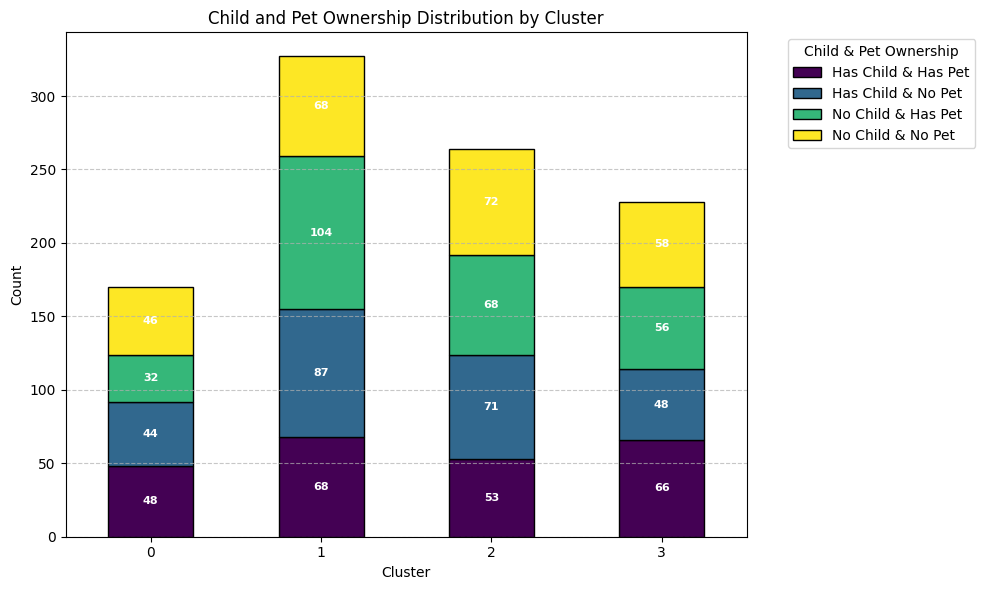

In [31]:
family_data['Child_Pet_Ownership'] = (
    family_data['Children_in_Household'].replace({"Yes": "Has Child", "No": "No Child"}) +
    " & " +
    family_data['Pet_Ownership'].replace({"Yes": "Has Pet", "No": "No Pet"})
)

child_pet_data = family_data.groupby(['Cluster', 'Child_Pet_Ownership']).size().unstack(fill_value=0)

ax = child_pet_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis',
    edgecolor='black'
)

for bar in ax.patches:
    value = int(bar.get_height())
    if value > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() / 2
        ax.text(x, y, str(value), ha='center', va='center', fontsize=8, color='white', fontweight='bold')

plt.title('Child and Pet Ownership Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Child & Pet Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The over-all reason of doing this analysis was to understand that which cluster has least responsibilities. The pet or a child could be a responsibility and people with these might need to be taregtted differently, by giving them specific solutions for their responsibilities (like providing in-park pet sitting options or special children events, safe children entertainment zones, etc)


**Cluster 1:**

- Largest and most diverse, with a higher presence of childless households (particularly No Child & Has Dog).

- Ideal for marketing pet-related services we have at our park (like pet-sitting, etc) and targeting adults without children.

**Cluster 0:**

- Strong representation of family households with children and pets (Has Child & Has Dog).

- Best suited for family-focused campaigns or events which we will have at the park.

**Cluster 2:**

- Balanced cluster with a notable mix of childless households and family households.

- Suitable for both family-oriented and pet-related event efforts.

**Cluster 3:**

- Primarily childless households with a lower proportion of pet ownership.

- Targeting adult-only audiences without pets would be effective for this cluster.

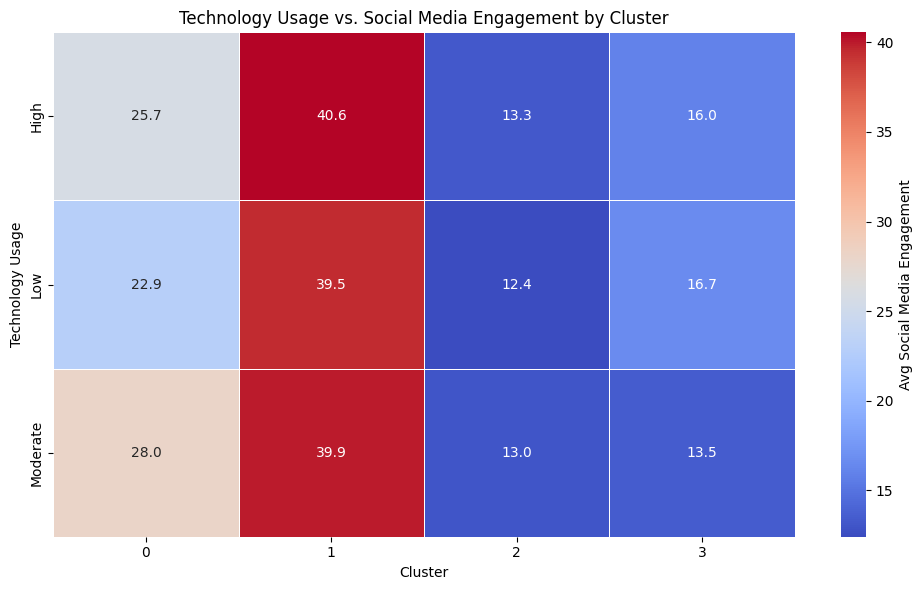

In [32]:
heatmap_data = family_data.groupby(['Technology_Usage', 'Cluster'])['Social_Media_Engagement'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Avg Social Media Engagement'}
)

plt.title('Technology Usage vs. Social Media Engagement by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Technology Usage')
plt.tight_layout()
plt.show()

**Interpretation**

**Cluster 1 (High Social Media Engagement):**

- High social media engagement across all technology usage levels.
- Best segment for digital marketing campaigns, leveraging their strong online presence.

**Cluster 0 (Moderate Social Media Engagement):**

- Moderate engagement with higher interaction for households with moderate or high technology usage.

- We can target them through a mix of online and traditional media channels.

**Clusters 2 & 3 (Low Social Media Engagement):**

- Lowest engagement levels, regardless of technology usage.

- These segments might respond better to community-driven or offline marketing strategies which we will be discussing further.

**Key Takeaway**

- We should be focussing on Cluster 1 for digital campaigns due to their high online activity.

- Use traditional and hybrid strategies for Clusters 0, 2, and 3 to boost engagement.

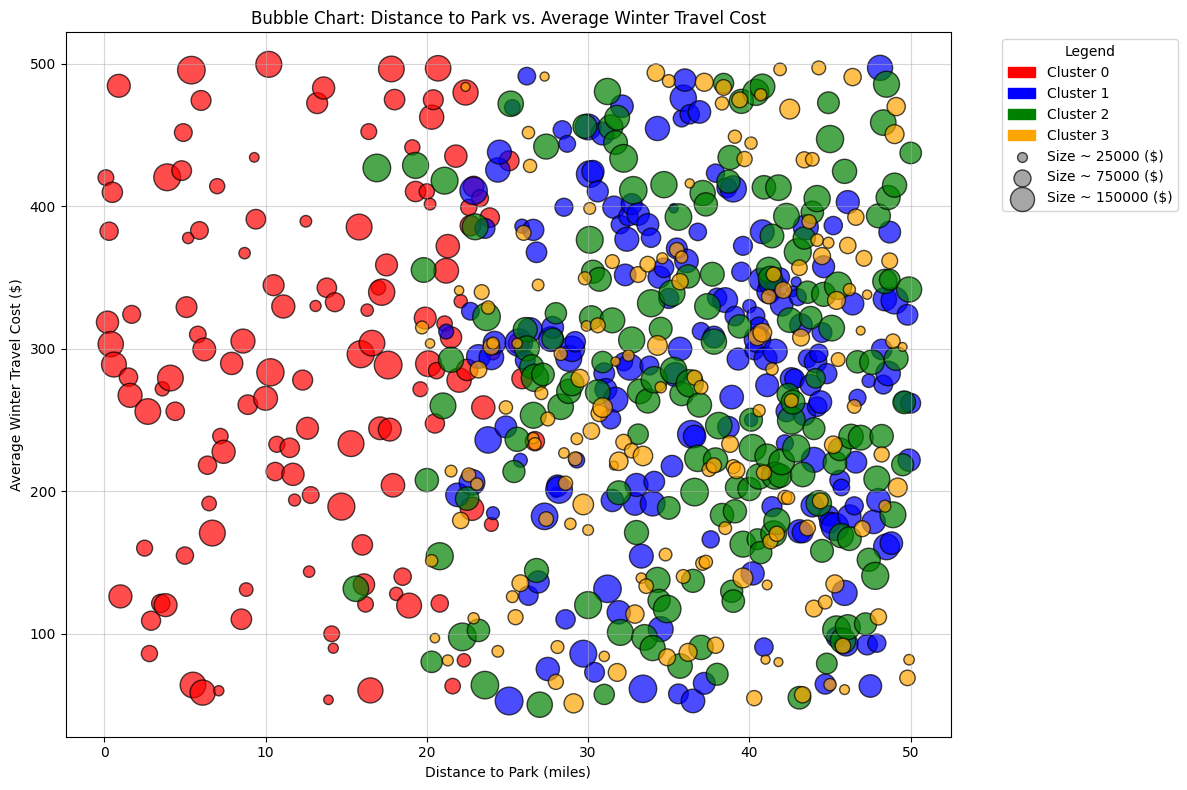

In [33]:

bubble_data = family_data.groupby(['Cluster', 'Distance_to_Park']).agg({
    'Average_Winter_Travel_Cost': 'mean',
    'Household_Income': 'mean'
}).reset_index()


cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange'
}
bubble_data['Color'] = bubble_data['Cluster'].map(cluster_colors)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_data['Distance_to_Park'],
    bubble_data['Average_Winter_Travel_Cost'],
    s=bubble_data['Household_Income'] / 500,
    c=bubble_data['Color'],
    alpha=0.7,
    edgecolors='black'
)


plt.title('Bubble Chart: Distance to Park vs. Average Winter Travel Cost')
plt.xlabel('Distance to Park (miles)')
plt.ylabel('Average Winter Travel Cost ($)')


cluster_handles = [
    mpatches.Patch(color=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()
]


size_labels = [50, 150, 300]
size_handles = [
    plt.scatter([], [], s=size, color='gray', alpha=0.7, edgecolors='black', label=f'Size ~ {size * 500} ($)')
    for size in size_labels
]


plt.legend(handles=cluster_handles + size_handles, title='Legend', loc='upper left', bbox_to_anchor=(1.05, 1))


plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Interpretation:

**Cluster 0 (Red):**

- Closest to the park (low distances).

- Higher average winter travel costs, indicating frequent or premium travel options.

- Key target for exclusive and premium winter experiences which we are planning in the park, due to their proximity and travel spending.

**Cluster 1 (Blue):**

- Moderate distance to the park with balanced travel costs.

- Represents a balanced segment for us

- they can be targeted with cost-effective but engaging travel packages.

**Cluster 2 (Green):**

- Wide range of distances, mostly mid-range, with moderate travel costs.

- Likely to include families planning occasional visits

- we target them with bundled packages like family discounts or group events.

**Cluster 3 (Orange):**

- Farthest from the park, with relatively lower travel costs.

- Less frequent visitors

- we target this group with special events or promotions to incentivize travel.

**Key Takeaway:**

- We should focus on Cluster 0 for premium offerings and frequent engagement.

- we can use targeted campaigns for Cluster 1 and Cluster 2 to sustain mid-level visitors.

- We also recommend to develop travel-inclusive offers for Cluster 3 to encourage visits despite distance.

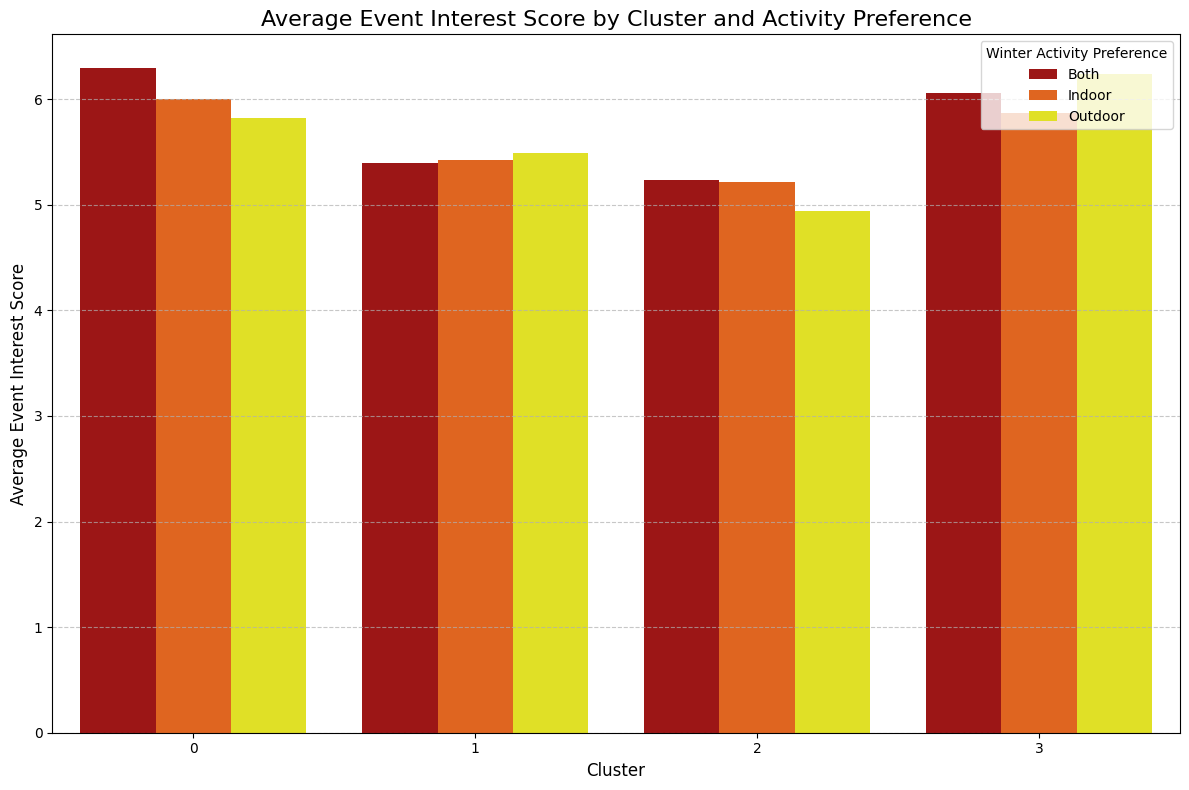

In [34]:
avg_event_score = family_data.groupby(['Cluster', 'Winter_Activity_Preference'])['Event_Interest_Score'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_event_score,
    x='Cluster',
    y='Event_Interest_Score',
    hue='Winter_Activity_Preference',
    palette='hot',
    dodge=True
)

plt.title('Average Event Interest Score by Cluster and Activity Preference', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Event Interest Score', fontsize=12)
plt.legend(title='Winter Activity Preference', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Interpretation:

**Cluster 0:**

- They shows the highest average event interest score, particularly for those who prefer both indoor and outdoor activities.

- We can create diverse, balanced events combining indoor and outdoor activities to engage this cluster effectively.

**Cluster 1:**

- For them, event interest scores are consistent across activity preferences, slightly lower than Cluster 0.

- We can focus on activity-specific events (e.g., exclusive indoor or outdoor events) to cater to their specific preferences.

**Cluster 2:**

- They display moderate to low interest in events, particularly for outdoor activities.

- We should encourage participation through bundled discounts or collaborative experiences involving family or social groups.

**Cluster 3:**

- Event interest scores are relatively high for both and outdoor preferences, suggesting growing engagement.

- We can promote outdoor-themed events with unique experiences to attract this group further.

**Overall Insight:**

We should focus on Cluster 0 for premium event offerings and Cluster 1 for tailored activity-based promotions. For Cluster 2, drive engagement with offers, while Cluster 3 can be targeted with experiential marketing around outdoor activities.


#Naming the Clusters and Targeting Strategies for Each of them

##Cluster 0: The Proximal Elites

**Why this name?**

This cluster resides closest to Lobster Land, spends the most on travel, and has high household incomes with families and pet ownership.

**Description:**

The Proximal Elites value premium experiences and are willing to invest in high-quality outings. Their proximity and financial means make them ideal for exclusive offerings.

**Targeting Strategy**

Premium Experiences:

- We can offer VIP passes with perks such as priority access, reserved seating at events, and exclusive dining areas.
- Can create “Family Adventure Packages” that include access to kid-friendly zones and pet-friendly amenities.
- We also recommend to add premium pet services like pet-sitting, pet-friendly activity zones, and "Pawcation Packages."

Local Community Engagement:

- We can launch community-driven campaigns to build strong local ties, such as inviting nearby households to exclusive preview events.
- Offering loyalty programs for frequent visitors with perks like discounted future visits or merchandise rewards.

Digital-First Campaigns:

- Focusing heavily on targeted social media advertising, as their engagement levels are high.
- Running family-centric campaigns with relatable content featuring themes of togetherness and fun.

Seasonal Offers:

- Promoting winter experiences tailored to their high winter travel spending, such as festive events, themed attractions, and evening light shows.

##Cluster 1: The Social Savvies

**Why this name?**
This cluster is the most socially active online, with moderate distances to Lobster Land and diverse household structures.

**Description**
They represent a digitally connected audience who can amplify the park's presence. This cluster includes a mix of families and individuals, making it a versatile segment for our marketing.

**Targeting Strategy:**

Engaging Social Media Campaigns:

- Runing interactive campaigns like polls, contests, and giveaways to amplify park awareness.
- Promoting user-generated content campaigns with hashtags encouraging visitors to share their experiences online.

Flexible Ticketing Options:

- We can offer customizable tickets for different household types (e.g., Family Pass, Pet Pass, Couples Retreat).
- Introducing evening or half-day tickets to accommodate their mid-range distance from the park.

Experiences Tailored for All:

- We can highlight diverse offerings at Lobster Land to appeal to their household mix. For example, pet-friendly zones, indoor activities, and adult-oriented lounges.
- Developing "Social Weekend Packages" that combine lodging, dining, and park activities for groups.

Digital Promotions:

- Leveraging digital advertising on platforms like Instagram and Facebook, where this cluster is highly active.
- Including referral-based discounts, encouraging visitors to bring along friends and family.


##Cluster 2: The Occasional Explorers

**Why this name?**

With a mid-range distance from the park, moderate travel costs, and occasional event interest, this cluster is characterized by infrequent but meaningful visits.

**Description:**

The Occasional Explorers value group experiences and discounts, preferring bundled offers that reduce their overall expenditure.

**Targeting Strategy:**

Value-Driven Campaigns:

- We should offer group discounts, family bundles, or season passes to lower the overall cost of visits.
- Designing packages that provide savings on meals, souvenirs, and activities.

Seasonal and Event-Based Marketing:

- Focusing on promoting seasonal attractions, such as holiday-themed events or summer festivals.
- Introducing special discounts during off-peak seasons to incentivize more frequent visits.

Collaborative Experiences:

- We should here Emphasize activities that allow for social interaction, such as group games, family competitions, or team-building events.
- Partnering with local schools or community groups to encourage organized trips.

Traditional Marketing Channels:

- We can use a mix of digital and offline marketing methods, such as email campaigns, posters in local communities, and collaborations with nearby businesses.

##Cluster 3: The Distant Dreamers

**Why this name?**

They are the farthest from Lobster Land with low travel costs, minimal engagement, and a preference for outdoor activities.

**Description:**

The Distant Dreamers require strong incentives to visit the park, as distance and limited resources make frequent trips unlikely.

**Targeting Strategy:**

Travel-Inclusive Offers:

- Provideing them discounted travel packages, including shuttle services or group transportation.
- Partnering with nearby hotels to create weekend getaways that include park entry, accommodation, and meals.

Outdoor Activity Promotions:

- Marketing outdoor experiences such as outdoor rides, parades and events.

Targeted Community Outreach:

- Use local advertising in areas or communities farther from the park.
- Collaborate with travel agencies or community organizations to attract this audience.

**Prioritization of Efforts:**

- Top Priority: Cluster 0 (The Proximal Elites)

should be the primary focus due to their high spending potential, proximity, and family-oriented nature.

- Second Priority: Cluster 1 (The Social Savvies)

offers a strong opportunity for digital marketing campaigns and broad appeal across diverse household types.

- Moderate Priority: Cluster 2 (The Occasional Explorers)

should be targeted with seasonal campaigns and bundled offers to increase their frequency of visits.

- Low Priority: Cluster 3 (The Distant Dreamers)

requires specialized promotions and travel-inclusive packages to justify their visit.

##Our Final Suggestion:

Based on our analysis and visualizations, we the 'Version 5.0 Consultants' recommend prioritizing Cluster 0 for Lobster Land’s local marketing efforts. This cluster, located closest to the park and centered near Portland, exhibits high household incomes and significant winter travel expenditures, making them ideal for premium offerings. Strategies such as VIP passes, family-friendly adventure packages, and exclusive pet services can enhance their park experience. Their strong social media engagement further supports targeted digital campaigns to strengthen their connection with Lobster Land. Additionally, community-driven initiatives like loyalty programs and exclusive previews can foster lasting relationships with this high-potential audience.

For Cluster 1, the focus should be on leveraging their strong digital presence to amplify park awareness through interactive social media campaigns and user-generated content. Offering customizable ticketing options and diverse activities will appeal to their varied household structures.

Because Cluster 2 and Cluster 3 are lower priorities, and also distant from the park, we recommend not to invest too much of the marketing budget behind them. The basic targeted seasonal promotions, bundled offers, and travel-inclusive packages can effectively attract these segments if required.


.



.





.

.


.

.
.
.
.
.
.
.
.
.
.

.
.
.
.
.
.
.
.
.
.
.
.
.
.

.
.
.
.
.
...
.

.
.
.
.
.
.
.
.
.
.
.
\.
.
.
\


.
.
.
.
.
.
.
.
.
.

.
.
.
.
.
.
.
.
.

